# Support Vector Machine

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data / 16., digits.target % 2, random_state=2)

In [6]:
from sklearn.svm import LinearSVC, SVC
linear_svc = LinearSVC(loss = "hinge").fit(X_train, y_train)
svc = SVC(kernel = "linear").fit(X_train, y_train)

In [7]:
np.mean(linear_svc.predict(X_test) == svc.predict(X_test))

1.0

## Kernel SVMs

Predictions in kernel-SVM are made using the formula
$$
\hat{y} = \alpha_0 + \alpha_1 y_1 k(\mathbf{x^{(1)}}, \mathbf{x}) + ... + \alpha_n y_n k(\mathbf{x^{(n)}}, \mathbf{x})> 0
$$

$$
0 \leq \alpha_i \leq C
$$
Radial basis function (Gaussian) kernel:
$$k(\mathbf{x}, \mathbf{x'}) = \exp(-\gamma ||\mathbf{x} - \mathbf{x'}||^2)$$

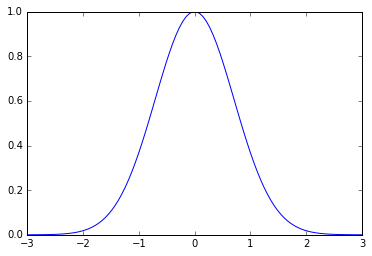

In [9]:
from sklearn.metrics.pairwise import rbf_kernel
line = np.linspace(-3, 3, 100)[:, np.newaxis]
kernel_value = rbf_kernel([[0]], line, gamma = 1)
plt.plot(line, kernel_value.T)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.externals.joblib import Memory

def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

def make_handcrafted_dataset():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y


def plot_rbf_svm_parameters():
    X, y = make_handcrafted_dataset()

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    for ax, C in zip(axes, [1e0, 5, 10, 100]):
        ax.scatter(X[:, 0], X[:, 1], s=150, c=np.array(['red', 'blue'])[y])

        svm = SVC(kernel='rbf', C=C).fit(X, y)
        plot_2d_separator(svm, X, ax=ax, eps=.5)
        ax.set_title("C = %f" % C)

    fig, axes = plt.subplots(1, 4, figsize=(15, 3))
    for ax, gamma in zip(axes, [0.1, .5, 1, 10]):
        ax.scatter(X[:, 0], X[:, 1], s=150, c=np.array(['red', 'blue'])[y])
        svm = SVC(gamma=gamma, kernel='rbf', C=1).fit(X, y)
        plot_2d_separator(svm, X, ax=ax, eps=.5)
        ax.set_title("gamma = %f" % gamma)


def plot_svm(log_C, log_gamma):
    X, y = make_handcrafted_dataset()
    C = 10. ** log_C
    gamma = 10. ** log_gamma
    svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X, y)
    ax = plt.gca()
    plot_2d_separator(svm, X, ax=ax, eps=.5)
    # plot data
    ax.scatter(X[:, 0], X[:, 1], s=150, c=np.array(['red', 'blue'])[y])
    # plot support vectors
    sv = svm.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], s=230, facecolors='none', zorder=10, linewidth=3)
    ax.set_title("C = %.4f gamma = %.4f" % (C, gamma))


def plot_svm_interactive():
    from IPython.html.widgets import interactive, FloatSlider
    C_slider = FloatSlider(min=-3, max=3, step=.1, value=0, readout=False)
    gamma_slider = FloatSlider(min=-2, max=2, step=.1, value=0, readout=False)
    return interactive(plot_svm, log_C=C_slider, log_gamma=gamma_slider)

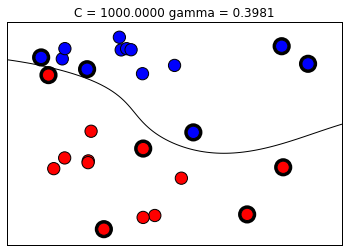

In [13]:
plot_svm_interactive()

In [14]:
svc = SVC().fit(X_train, y_train)
svc.score(X_test, y_test)

0.9177777777777778

In [17]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10, 100]

from sklearn.grid_search import GridSearchCV

param_grid = {'C': Cs, 'gamma': gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [18]:
grid_search.score(X_test, y_test)

0.98666666666666669

We extract just the scores

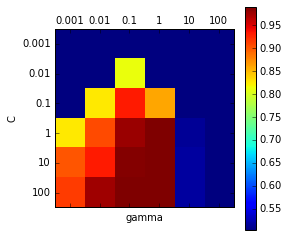

In [19]:
# We extract just the scores
scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(6, 6)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(6), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);